In [133]:
import pandas as pd
import utils
contest = '577'
df = utils.read_responses(f'{contest}-responses.csv.zip')

In [134]:
df = df.sort_values(by='timestamp_query_generated')
df.dtypes

alg_label                            object
network_delay                       float64
participant_uid                      object
response_time                       float64
target                               object
target_id                             int64
target_reward                       float64
timestamp_query_generated    datetime64[ns]
dtype: object

In [135]:
time_start = df.groupby('participant_uid')['timestamp_query_generated'].min()
time_end = df.groupby('participant_uid')['timestamp_query_generated'].max()
users = pd.DataFrame({'time_start': time_start, 'time_end': time_end})

# row: participants. columns = [time_start, time_end]
for key in ['time_start', 'time_end']:
    users[key] = users[key].apply(lambda dt: dt.timestamp())

times = users[['time_start', 'time_end']].T.values
times = times.astype('int64')
assert np.all(times[0] <= times[1])

one_query_users = (times[0] == times[1]).sum()
total_users = times.shape[1]
print("Fraction of users that answered one question =", one_query_users / total_users)

Fraction of users that answered one question = 0.1326364246667306


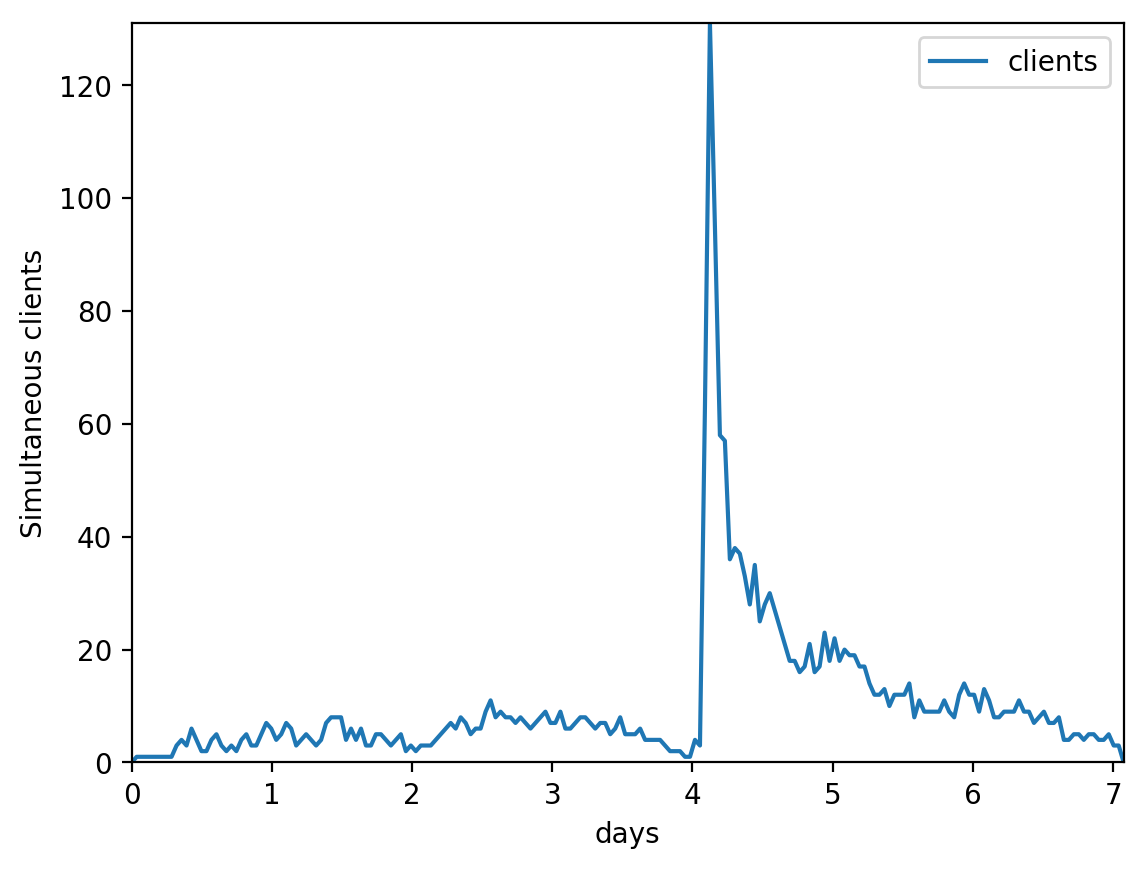

In [146]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

start, end = times.min(), times.max()
T = np.linspace(start, end, num=200)

out = []
for t in T:
    started_before_t = (times[0] < t)
    ended_after_t = (t < times[1])
    i = started_before_t & ended_after_t
    out += [{'seconds': t, 'clients': i.sum()}]

out = pd.DataFrame(out)
out['seconds'] -= out['seconds'].min()
out['minutes'] = out['seconds'] / 60
out['hours'] = out['minutes'] / 60
out['days'] = out['hours'] / 24
out.plot(x='days', y='clients')
plt.ylabel('Simultaneous clients')
plt.margins(0)

Signature: plt.margins(*args, **kw)
Docstring:
Set or retrieve autoscaling margins.

signatures::

    margins()

returns xmargin, ymargin

::

    margins(margin)

    margins(xmargin, ymargin)

    margins(x=xmargin, y=ymargin)

    margins(..., tight=False)

All three forms above set the xmargin and ymargin parameters.
All keyword parameters are optional.  A single argument
specifies both xmargin and ymargin.  The *tight* parameter
is passed to :meth:`autoscale_view`, which is executed after
a margin is changed; the default here is *True*, on the
assumption that when margins are specified, no additional
padding to match tick marks is usually desired.  Setting
*tight* to *None* will preserve the previous setting.

Specifying any margin changes only the autoscaling; for example,
if *xmargin* is not None, then *xmargin* times the X data
interval will be added to each end of that interval before
it is used in autoscaling.
File:      ~/anaconda3/lib/python3.6/site-packages/matplotlib/pyp